In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice plotting style
sns.set_theme(style="whitegrid")
print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
# The '..' goes up one directory level from 'notebooks' to the project root
DATA_FOLDER = r"C:\Achu\Projects\NLP - Project (Software Engg)\climate-news-analysis\data"
all_articles = []

# Check if the data folder exists
if not os.path.exists(DATA_FOLDER):
    raise FileNotFoundError(f"Data folder not found at '{DATA_FOLDER}'. Make sure it exists and contains your .jsonl files.")

print(f"Loading files from: {os.path.abspath(DATA_FOLDER)}")

# Loop through each file in the data folder
for filename in os.listdir(DATA_FOLDER):
    if filename.endswith('.jsonl'):
        source_name = filename.replace('.jsonl', '')
        file_path = os.path.join(DATA_FOLDER, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    article = json.loads(line)
                    # Add a column to track the original source file
                    article['source'] = source_name
                    all_articles.append(article)
                except json.JSONDecodeError:
                    print(f"Skipping a malformed line in: {filename}")

# Create the main DataFrame
df = pd.DataFrame(all_articles)

print(f"\nSuccessfully loaded {len(df)} articles from {len(df['source'].unique())} sources.")

Loading files from: C:\Achu\Projects\NLP - Project (Software Engg)\climate-news-analysis\data

Successfully loaded 90555 articles from 22 sources.


In [4]:
# Display the first 5 rows to see the structure
df.head()

,headline,body,date_published,article_name,article_url,article_start_url,datetime_crawled_utc,source
0,Climate change: no room for debate?,The browser or device you are using is out of ...,2015-06-15,climate-change-no-room-for-debate,http://america.aljazeera.com/watch/shows/techk...,http://america.aljazeera.com/watch/shows/techk...,2023-09-11 16:09:13,aljazeera
1,"The road to climate stability runs through us,...",Climate action at the local level can offset t...,2023-07-08,the-road-to-climate-stability-runs-through-us-...,https://www.aljazeera.com/opinions/2023/7/8/th...,https://www.aljazeera.com/opinions/2023/7/8/th...,2023-09-11 16:09:13,aljazeera
2,‘Never just the heat’: Signals of climate dist...,"Increasing temperatures, dying coral reefs and...",2023-07-06,never-just-the-heat-signals-of-climate-distres...,https://www.aljazeera.com/news/2023/7/6/never-...,https://www.aljazeera.com/news/2023/7/6/never-...,2023-09-11 16:09:13,aljazeera
3,Australia closes oldest coal power plant in pi...,The Liddell power station is set to be replace...,2023-04-28,australia-closes-oldest-coal-paint-in-pivot-to...,https://www.aljazeera.com/economy/2023/4/28/au...,https://www.aljazeera.com/economy/2023/4/28/au...,2023-09-11 16:09:13,aljazeera
4,What makes South Asia so vulnerable to climate...,Extreme weather events in the worlds most popu...,2023-07-08,what-makes-south-asia-so-vulnerable-to-climate...,https://www.aljazeera.com/news/2023/7/8/what-m...,https://www.aljazeera.com/news/2023/7/8/what-m...,2023-09-11 16:09:13,aljazeera


In [5]:
# Get a concise summary of the DataFrame
print("DataFrame Info:")
df.info()

print("\n" + "="*40)

# Check for the count of missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90555 entries, 0 to 90554
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   headline              90555 non-null  object
 1   body                  90555 non-null  object
 2   date_published        90555 non-null  object
 3   article_name          90555 non-null  object
 4   article_url           90555 non-null  object
 5   article_start_url     90555 non-null  object
 6   datetime_crawled_utc  90555 non-null  object
 7   source                90555 non-null  object
dtypes: object(8)
memory usage: 5.5+ MB


Missing Values per Column:
headline                0
body                    0
date_published          0
article_name            0
article_url             0
article_start_url       0
datetime_crawled_utc    0
source                  0
dtype: int64


Article count per source:
source
cnn                21378
nzherald           17777
skyau              14172
aljazeera          12380
independent         8389
dw                  2204
guardian            1396
stuff               1390
atlantic            1383
dailymail           1109
bbc                 1105
economist           1092
yomiuri              954
washington_post      900
fox                  873
nytimes              825
daily_nation         798
china_daily          771
newshub              618
folha                396
daily_post           361
batimes              284
Name: count, dtype: int64


C:\Users\Adityavk\AppData\Local\Temp\ipykernel_16684\2155053255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis', orient='h')


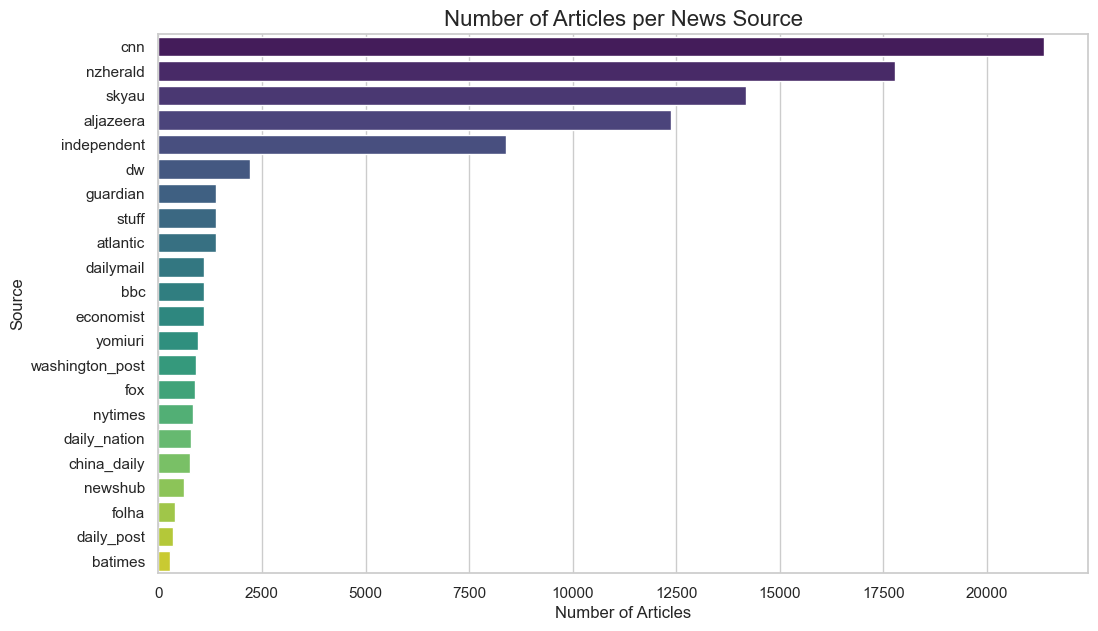

In [6]:
# Count the number of articles from each source
source_counts = df['source'].value_counts()

print("Article count per source:")
print(source_counts)

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis', orient='h')
plt.title('Number of Articles per News Source', fontsize=16)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.show()

Date range of articles: 1947-12-01 00:00:00 to 2025-08-20 00:00:00


C:\Users\Adityavk\AppData\Local\Temp\ipykernel_16684\3426306446.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  articles_per_month = df_time.set_index('date_published_dt').resample('M').size()


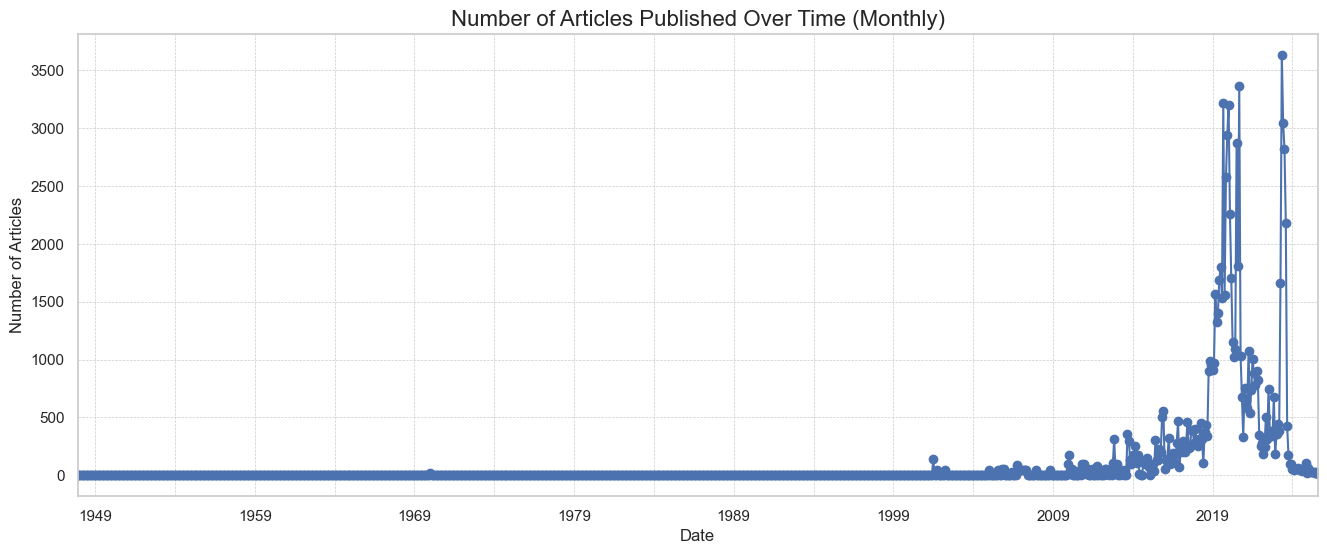

In [7]:
# Convert 'date_published' to datetime objects, setting errors to 'NaT' (Not a Time)
df['date_published_dt'] = pd.to_datetime(df['date_published'], errors='coerce')

# Drop rows where the date could not be parsed
df_time = df.dropna(subset=['date_published_dt']).copy()

print(f"Date range of articles: {df_time['date_published_dt'].min()} to {df_time['date_published_dt'].max()}")

# Resample by month and count articles
articles_per_month = df_time.set_index('date_published_dt').resample('M').size()

# Create the plot
plt.figure(figsize=(16, 6))
articles_per_month.plot(kind='line', marker='o')
plt.title('Number of Articles Published Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Descriptive statistics for article body length:
count     90555.000000
mean       4598.387786
std        3413.698338
min          17.000000
25%        2469.000000
50%        4209.000000
75%        6058.000000
max      101074.000000
Name: body_length, dtype: float64


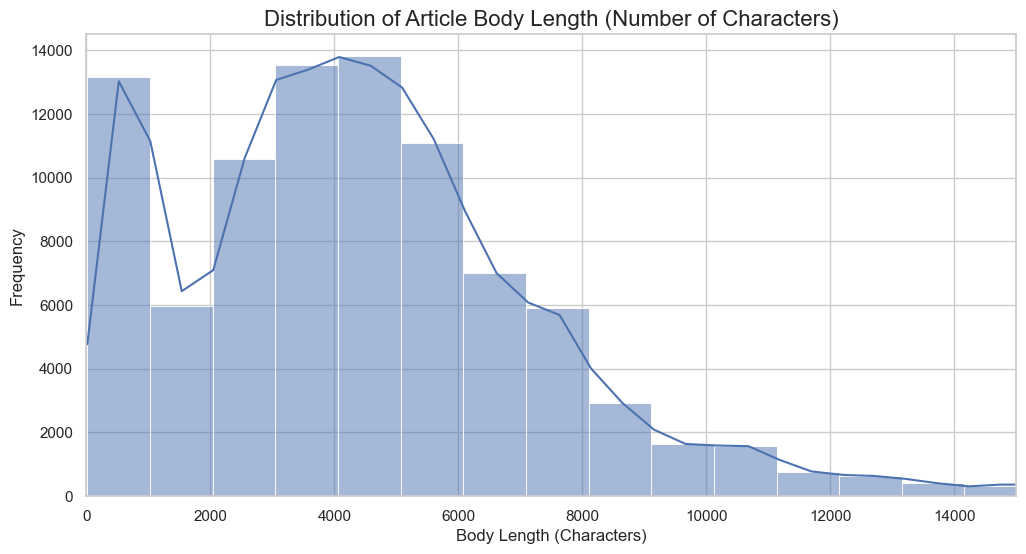

In [8]:
# Calculate the length of the article body for non-null entries
df['body_length'] = df['body'].dropna().str.len()

print("Descriptive statistics for article body length:")
print(df['body_length'].describe())

# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(df['body_length'], bins=100, kde=True)
plt.title('Distribution of Article Body Length (Number of Characters)', fontsize=16)
plt.xlabel('Body Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Set a reasonable x-limit to avoid extreme outliers stretching the plot
plt.xlim(0, 15000)
plt.show()